In [60]:
! pip install kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"sayansh001","key":"a0517fbadb8c251d521b847def10336f"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [61]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [62]:
! unzip /content/gtsrb-german-traffic-sign.zip

Archive:  /content/gtsrb-german-traffic-sign.zip
replace Meta.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [63]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [64]:
train_path = '/content/Train'

height=30
width=30
channels = 3

In [65]:
categories = os.listdir('/content/Train')
print(len(categories))


43


In [66]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

- numbers = [1, 2, 3]
- letters = ['a', 'b', 'c']
- zipped = zip(numbers, letters)
- list(zipped)
- [(1, 'a'), (2, 'b'), (3, 'c')]

Visualizing The Dataset

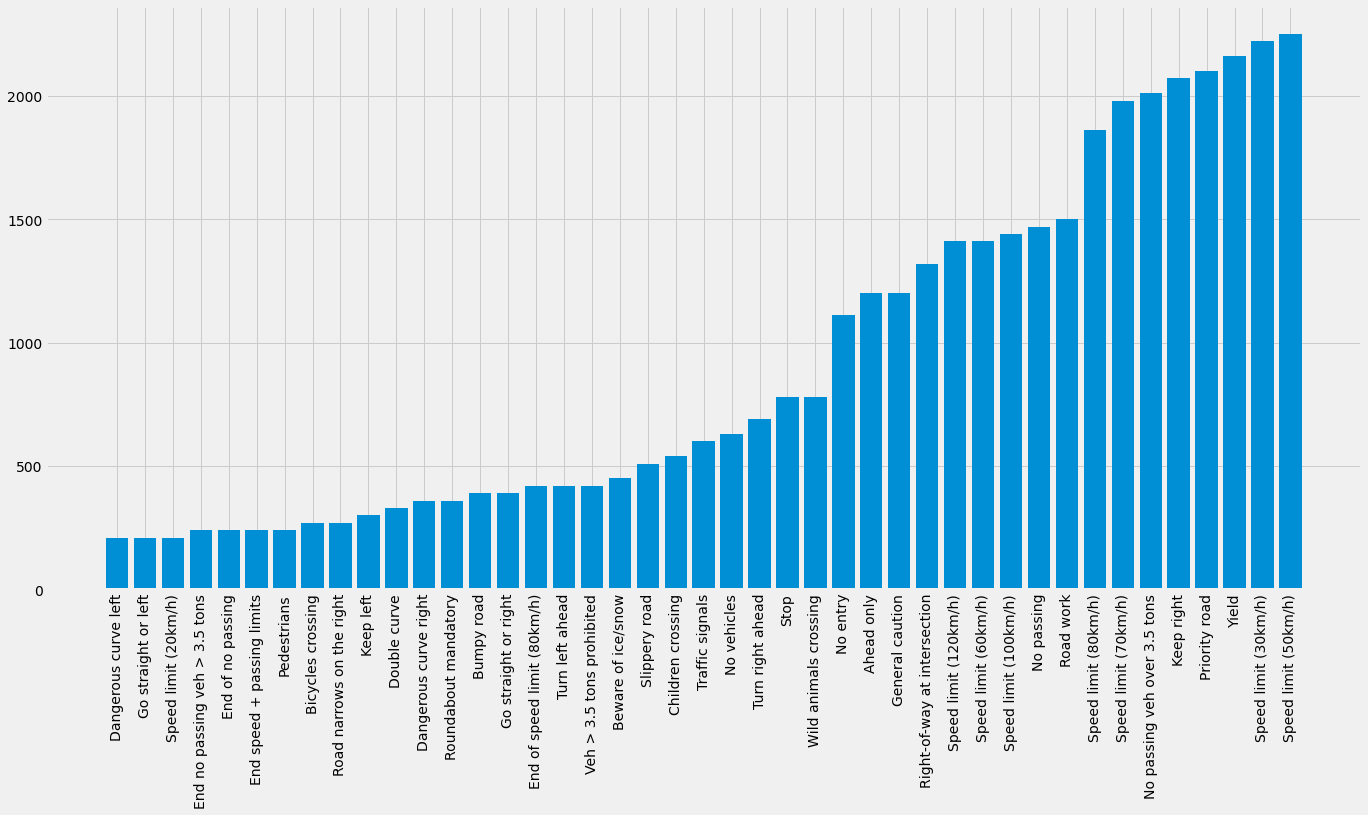

In [67]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    path = os.listdir(train_path+'/'+folder)
    train_number.append(len(path))    #appending the number of images in each class
    class_num.append(classes[int(folder)])   #appending in class_num the label from classes with index-int(folder)

zipped_lists = zip(train_number,class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num,train_number)
plt.xticks(class_num,rotation=90)
plt.show()

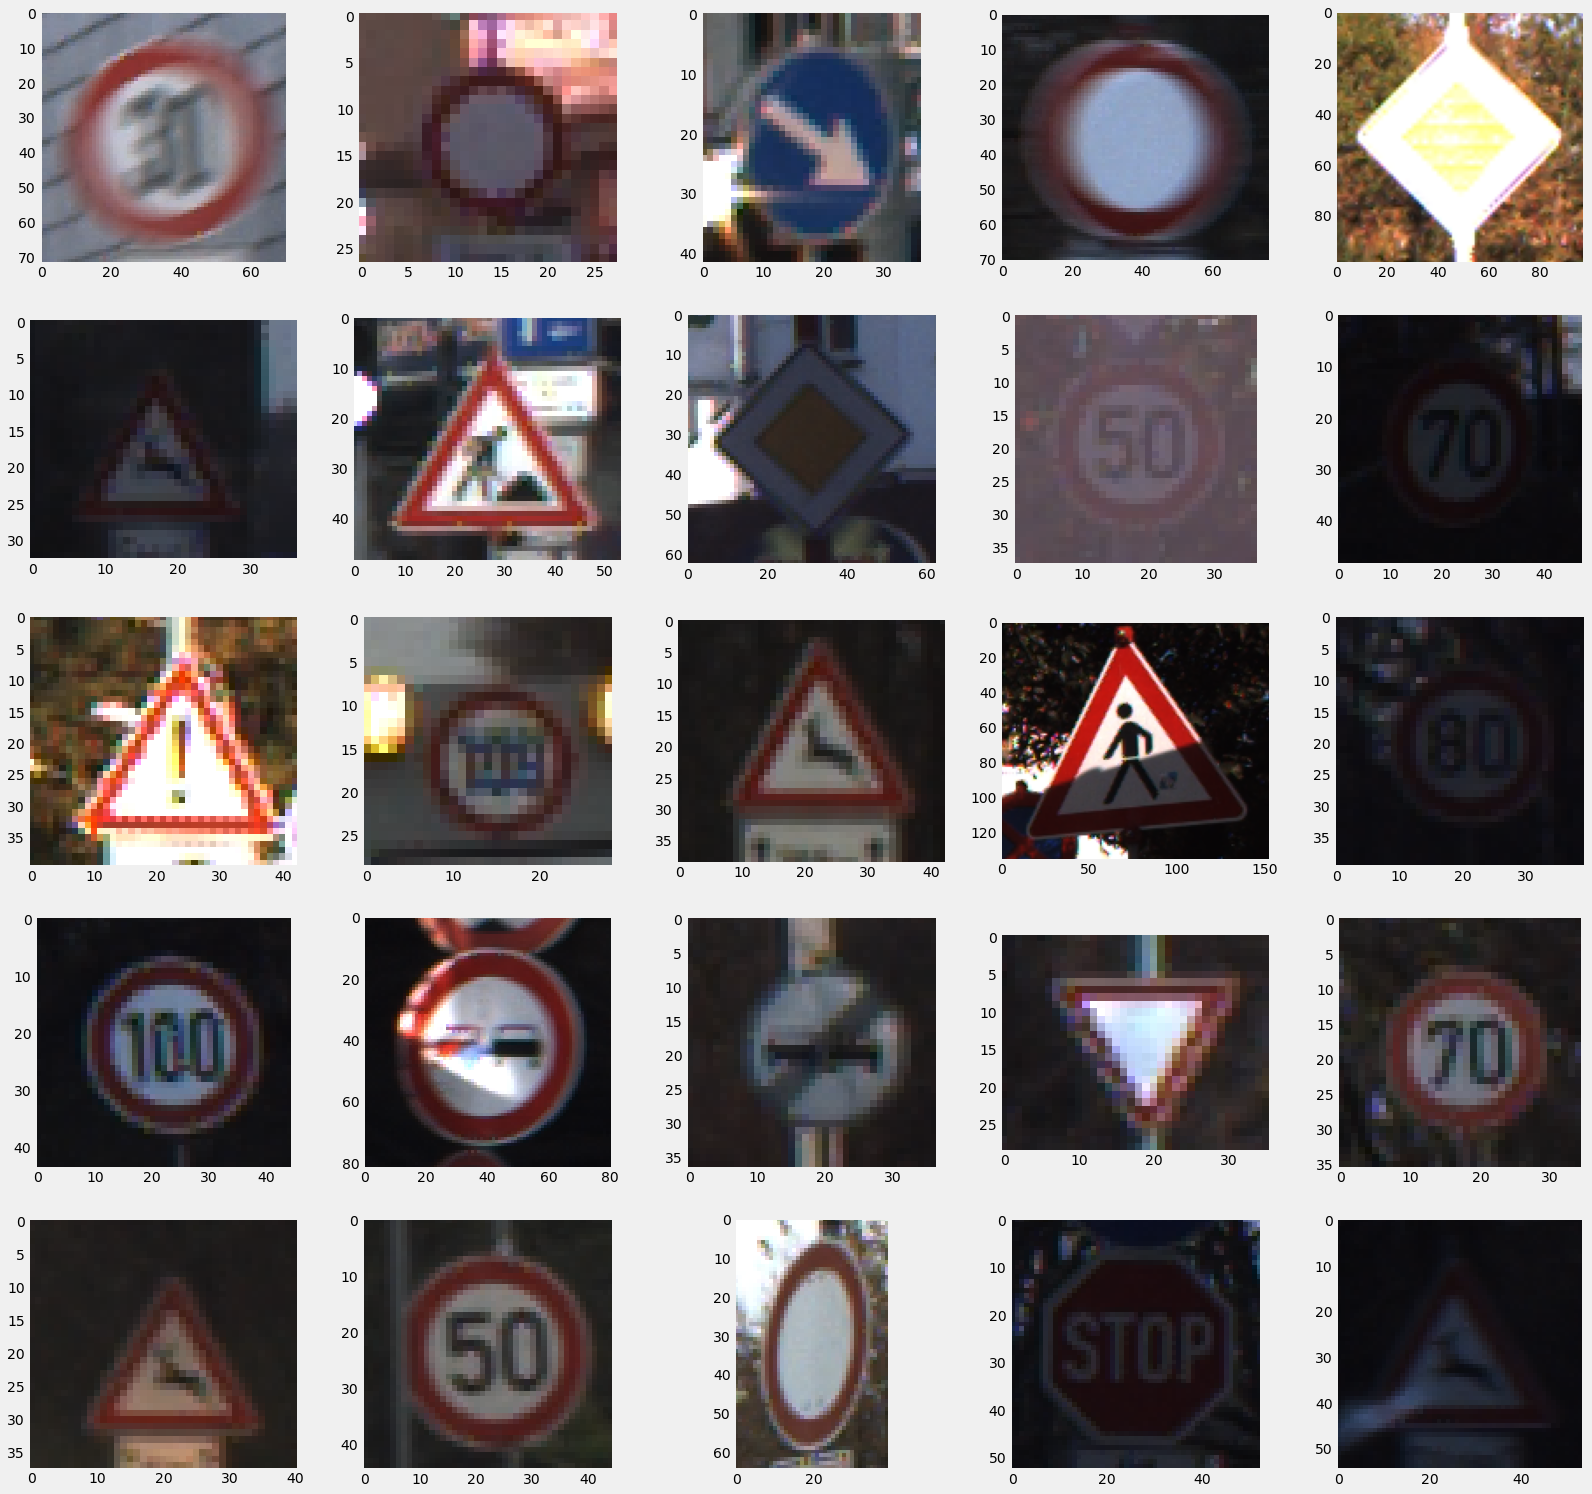

In [68]:
import random
from matplotlib.image import imread

test = pd.read_csv('/content/Test.csv')
imgs = test['Path'].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = '/content/'+random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)

In [69]:
image_data = []
image_labels = []

for i in range(len(categories)):
    path = '/content/Train/'+str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path+'/'+img)
            image_fromarray = Image.fromarray(image,'RGB')
            resize_image = image_fromarray.resize((height,width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in "+img)

In [70]:
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [71]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

# **Splitting the data into train and test**

In [72]:
X_train,X_test,y_train,y_test = train_test_split(image_data,image_labels,test_size=0.3,random_state=23,shuffle=True)

X_train = X_train/255
X_test = X_test/255

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

X_train.shape (27446, 30, 30, 3)
X_test.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_test.shape (11763,)


# **One-Hot Encoding**

In [73]:
y_train = keras.utils.to_categorical(y_train,len(categories))
y_test = keras.utils.to_categorical(y_test,len(categories))

print(y_train.shape)
print(y_test.shape)

(27446, 43)
(11763, 43)


In [78]:
'''cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=[30,30,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[30,30,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[30,30,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu',input_shape=[30,30,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(512, activation='relu'))
cnn.add(keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(rate=0.5))

cnn.add(keras.layers.Dense(43,activation='softmax'))'''

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
cnn.add(keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
cnn.add(keras.layers.Dropout(0.25))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(256, activation='relu'))
cnn.add(keras.layers.Dropout(rate=0.5))
cnn.add(keras.layers.Dense(43, activation='softmax'))

In [79]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [80]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        2432      
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                 

In [81]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    shear_range=0.15,
    horizontal_flip=True)

history = cnn.fit(aug.flow(X_train, y_train, batch_size=32), 
                  epochs=30, 
                  validation_data=(X_test, y_test))

Epoch 1/30
858/858 [==============================] - 23s 26ms/step - loss: 1.8396 - accuracy: 0.4659 - val_loss: 0.5320 - val_accuracy: 0.8504
Epoch 2/30
858/858 [==============================] - 22s 26ms/step - loss: 0.6203 - accuracy: 0.7973 - val_loss: 0.2510 - val_accuracy: 0.9243
Epoch 3/30
858/858 [==============================] - 24s 28ms/step - loss: 0.3882 - accuracy: 0.8732 - val_loss: 0.1475 - val_accuracy: 0.9579
Epoch 4/30
858/858 [==============================] - 24s 28ms/step - loss: 0.3020 - accuracy: 0.9028 - val_loss: 0.1073 - val_accuracy: 0.9674
Epoch 5/30
858/858 [==============================] - 22s 26ms/step - loss: 0.2446 - accuracy: 0.9214 - val_loss: 0.0679 - val_accuracy: 0.9803
Epoch 6/30
858/858 [==============================] - 23s 27ms/step - loss: 0.2157 - accuracy: 0.9296 - val_loss: 0.0792 - val_accuracy: 0.9759
Epoch 7/30
858/858 [==============================] - 23s 27ms/step - loss: 0.1976 - accuracy: 0.9356 - val_loss: 0.0697 - val_accuracy:

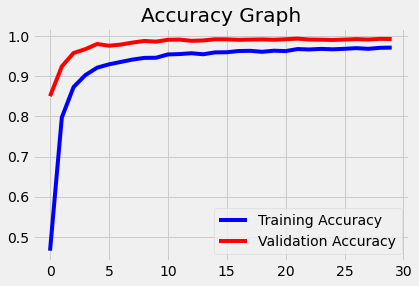

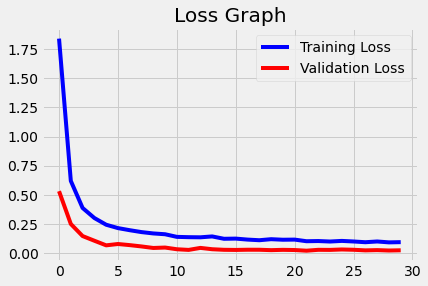

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [83]:
test = pd.read_csv('/content/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread('/content/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((30,30))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)

X_test = np.array(data)
X_test = X_test/255 

pred = cnn.predict(X_test).argmax(axis=1)

from sklearn.metrics import accuracy_score
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)


Test Data accuracy:  96.05700712589073


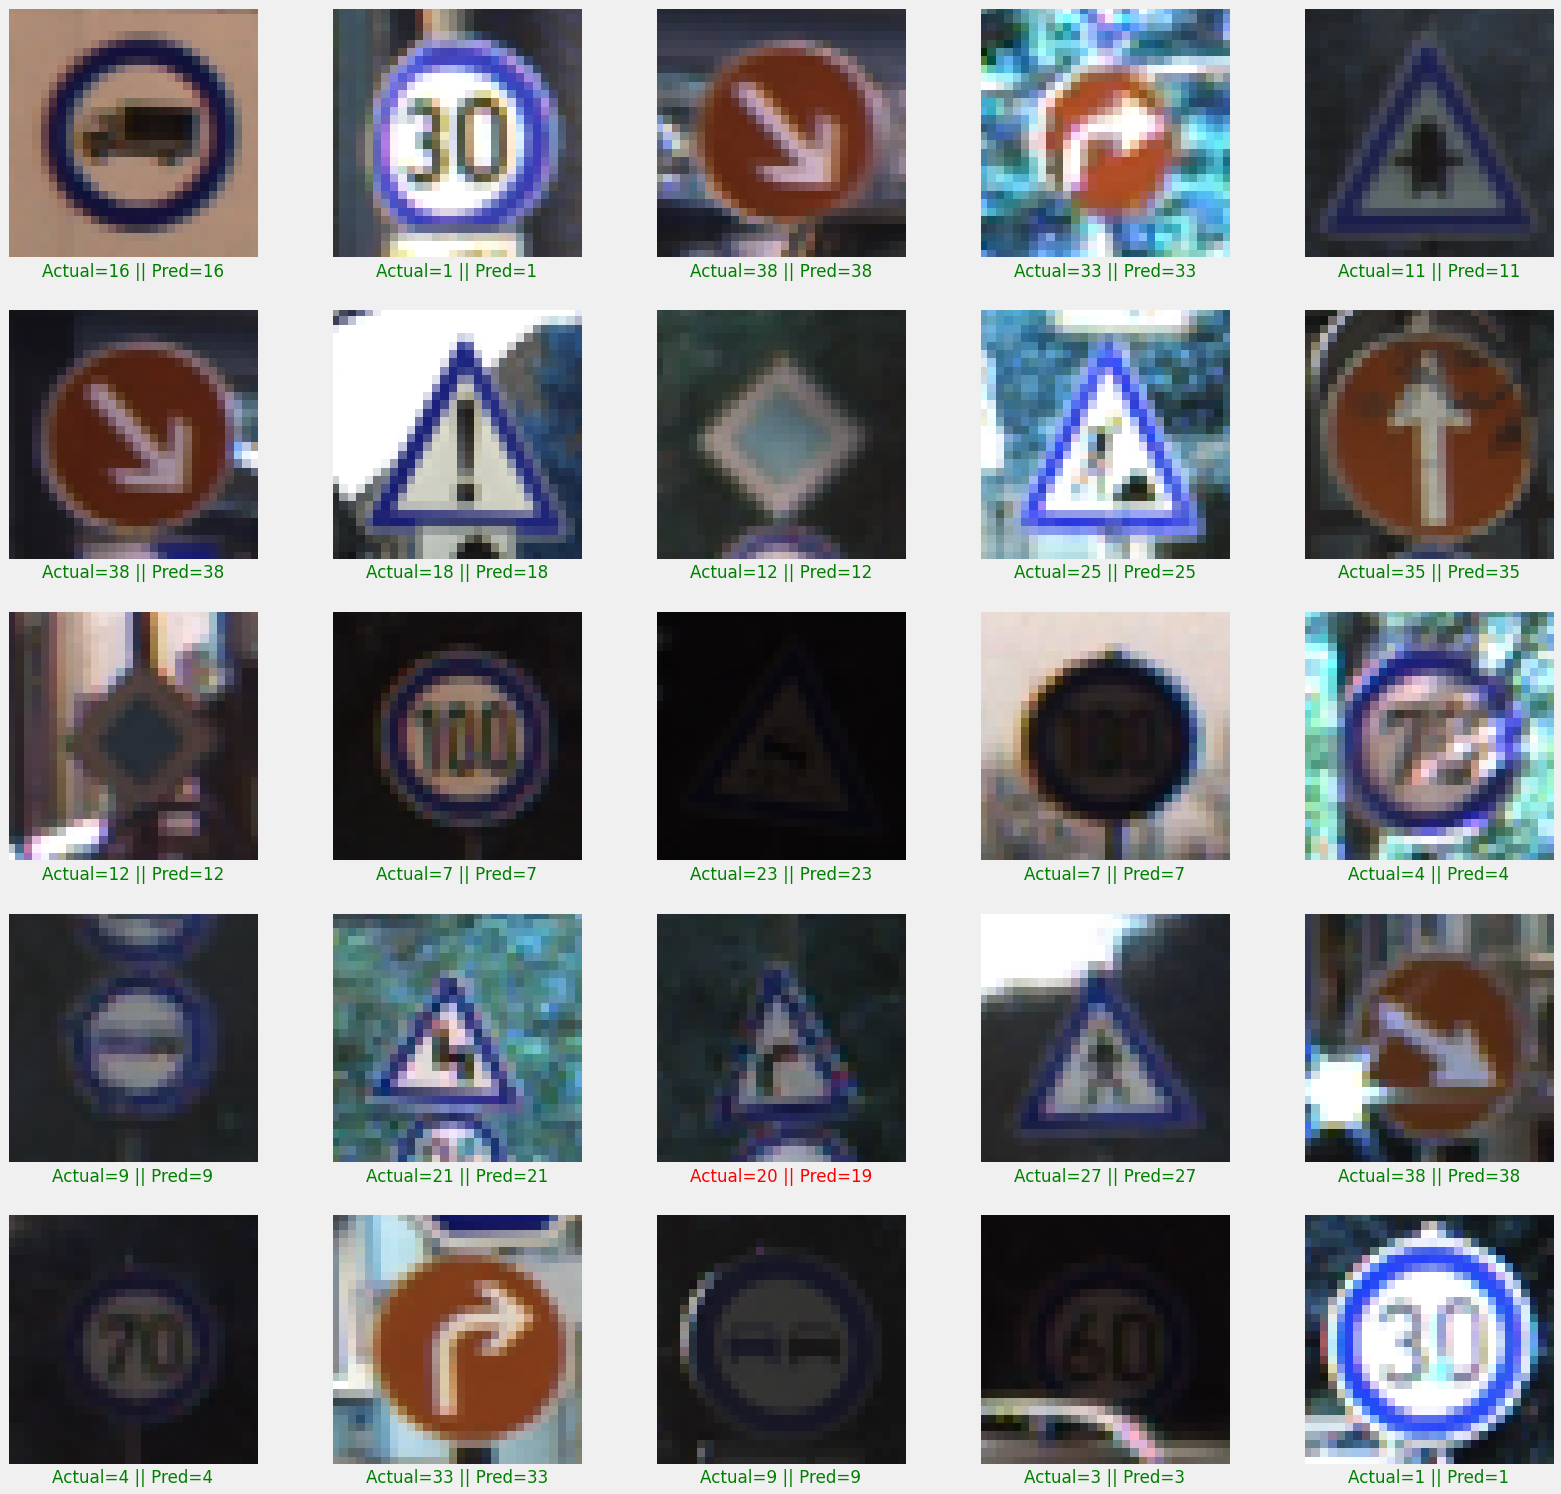

In [84]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()